In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("election2024.csv")

In [4]:
df

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [6]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [7]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [12]:
df[df['knows_election_date'] == "not sure or no answer"]

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
9,0716921d124ce8cd,male,36.0,central,city with population of 1 million and higher,not sure or no answer,likely no,Putin,less than 4 hours a day,over 4 hours a day,bachelor degree,very high,entrepreneur,NaN,housing and communal services,1.111258
20,0716a66543cceab7,female,29.0,southern,village,not sure or no answer,definitely no,Putin,less than 4 hours a day,over 4 hours a day,college,very high,parental leave,NaN,NaN,1.394099
26,071690bb968ce298,male,45.0,southern,city with population of 1 million and higher,not sure or no answer,definitely no,will not take part,once half a year,over 4 hours a day,college,very high,unemployed,NaN,NaN,0.846965
32,071662b8418cece9,male,48.0,siberian,village,not sure or no answer,definitely yes,Putin,over 4 hours a day,less than 4 hours a day,school,very high,unemployed,NaN,NaN,0.964146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,0716632eda8ce1e9,male,22.0,far eastern,village,not sure or no answer,definitely yes,Slutskiy,over 4 hours a day,over 4 hours a day,college,hard to say,work for hire,commercial organization,social services,1.400079
1586,0716ab675cccef19,male,26.0,north caucasian,village,not sure or no answer,not sure,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,work for hire,commercial organization,"industry, manufacturing",1.935815
1588,071654d3300ce72e,male,50.0,far eastern,city with population of less than 50k,not sure or no answer,definitely no,will not take part,does not watch,less than 4 hours a day,bachelor degree,hard to say,work for hire,commercial organization,"transportation, storage",1.183670
1589,071661f1c14cebe8,male,64.0,siberian,village,not sure or no answer,definitely yes,Putin,does not watch,several times a week,bachelor degree,hard to say,hard to say,NaN,NaN,1.209385


In [15]:
df['knows_election_date'].unique()

array(['named correct date', 'not sure or no answer', 'wrong answer',
       'named correct year'], dtype=object)

In [16]:
for col in df:
    uniq=df[col].unique()
    n_unique=len(uniq)
    print(f"\n{col} has {n_unique} values.some eg: {uniq[:10]}\n")


id has 1600 values.some eg: ['07169ed8148ce047' '0716a4f3354cecdd' '0716889b304ce79c'
 '07168e28b5cce563' '0716a563914ce549' '0716aac995cce5ae'
 '07169cf9604cee1c' '07168daf680ceff8' '0716aa97fe4ce46d'
 '0716921d124ce8cd']


sex has 2 values.some eg: ['male' 'female']


age has 71 values.some eg: [18. 23. 20. 22. 21. 27. 37. 43. 39. 36.]


federal_district has 8 values.some eg: ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']


type_of_city has 7 values.some eg: ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k']


knows_election_date has 4 values.some eg: ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year']


will_vote has 6 values.some eg: ['not sure' 'definitely yes' 'likely no' 'definitely no' 'likely yes'
 'struggle to answer']


candidat

In [17]:
category_mapping={  
    'named correct date':1,
    'not sure or no answer':0
}
df['knows_election_date']=df['knows_election_date'].map(category_mapping)

In [18]:
df.dropna(subset='knows_election_date',inplace=True) 

In [19]:
df['knows_election_date'].isna().sum()

np.int64(0)

In [21]:
df.drop('id',inplace=True,axis=1) 

In [22]:
income_map={
    'high': 4,'very high':5,'very low':1,'low':2,'medium':3
}

In [23]:
df=df[df['income']!='hard to say']  

In [24]:
df['income']=df['income'].map(income_map)

In [25]:
df['income'].unique()


array([5, 4, 3, 2, 1])

In [26]:
df['sex']=df['sex'].map({'male':1,'female':0})

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
type_of_city_order = [
    'village',
    'settlement',
    'city with population of less than 50k',
    'city with population of 50-100k',
    'city with population of 100-500k',
    'city with population of 500-950k',
    'city with population of 1 million and higher'
]

In [29]:
encoder=OrdinalEncoder(categories=[type_of_city_order])

In [31]:
df['type_of_city_encoded']=encoder.fit_transform(df[['type_of_city']])

In [32]:
df.drop('type_of_city',axis=1,inplace=True)

In [33]:
df.drop('company_type',axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511 entries, 0 to 1584
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   1511 non-null   int64  
 1   age                   1511 non-null   float64
 2   federal_district      1511 non-null   object 
 3   knows_election_date   1511 non-null   float64
 4   will_vote             1511 non-null   object 
 5   candidate             1511 non-null   object 
 6   television_usage      1511 non-null   object 
 7   internet_usage        1511 non-null   object 
 8   education             1511 non-null   object 
 9   income                1511 non-null   int64  
 10  employment            1511 non-null   object 
 11  job_type              662 non-null    object 
 12  weight1               1511 non-null   float64
 13  type_of_city_encoded  1511 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 177.1+ KB


In [35]:
df=df[~df['will_vote'].isin(['not sure','struggle to answer'])]

In [36]:
df['will_vote']=df['will_vote'].map({'definitely yes':1,'likely no':0,'likely yes':1,'definitely no':0})

In [37]:
cat_col=df.select_dtypes(include='O').columns
num_col=df.select_dtypes(exclude='O').columns

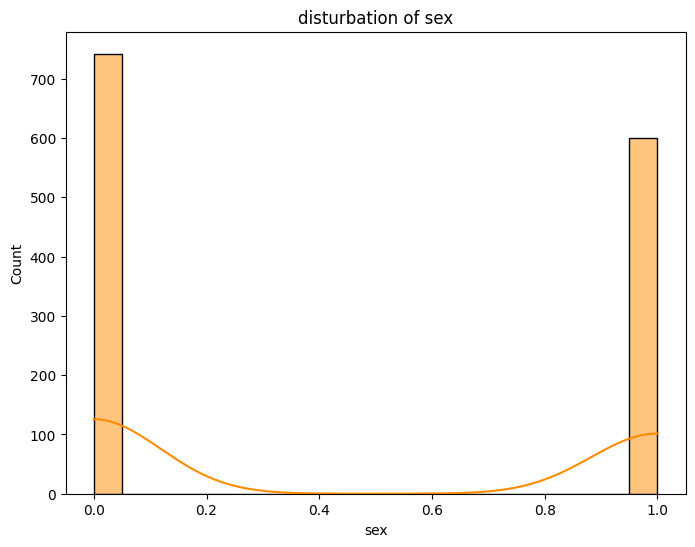

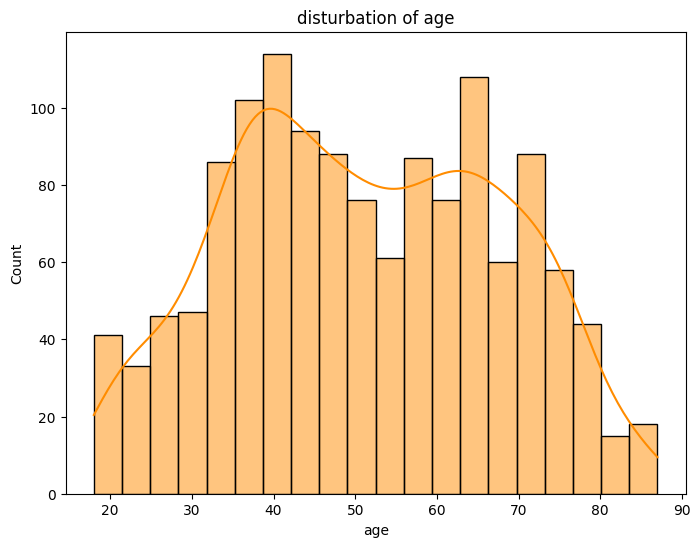

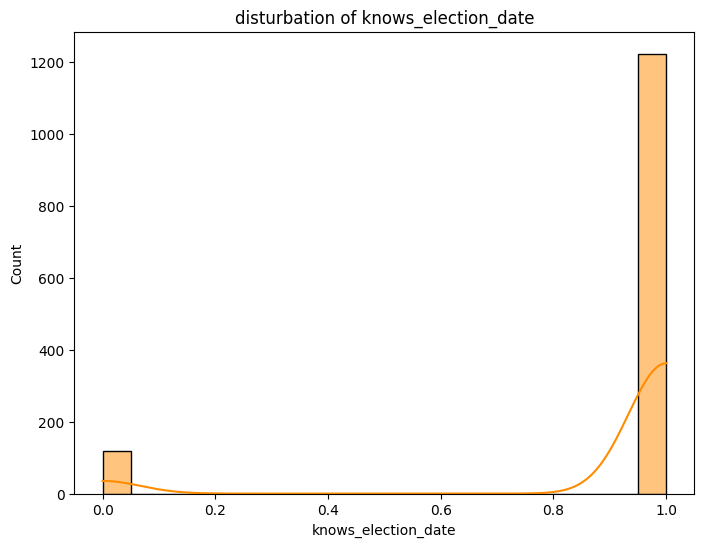

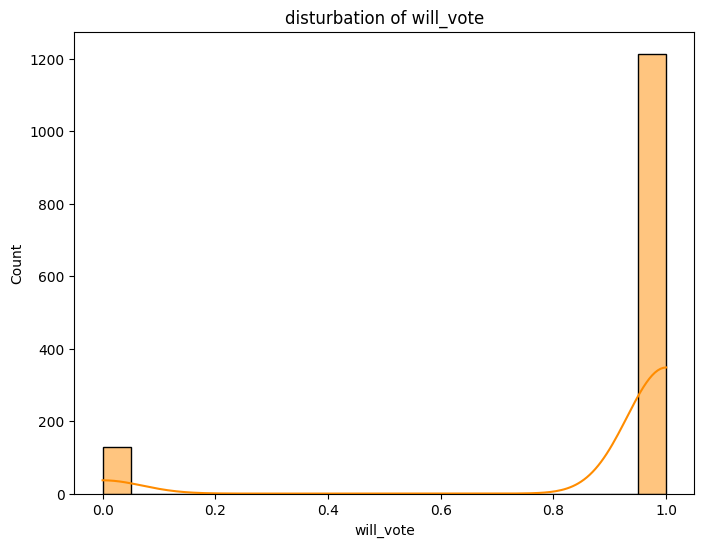

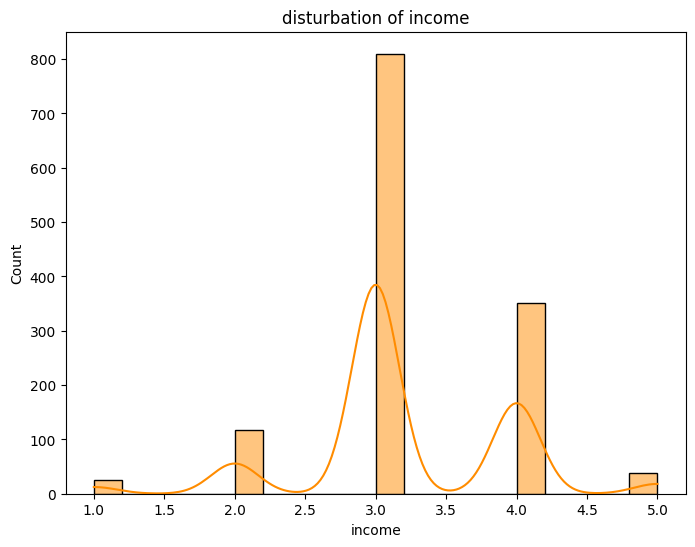

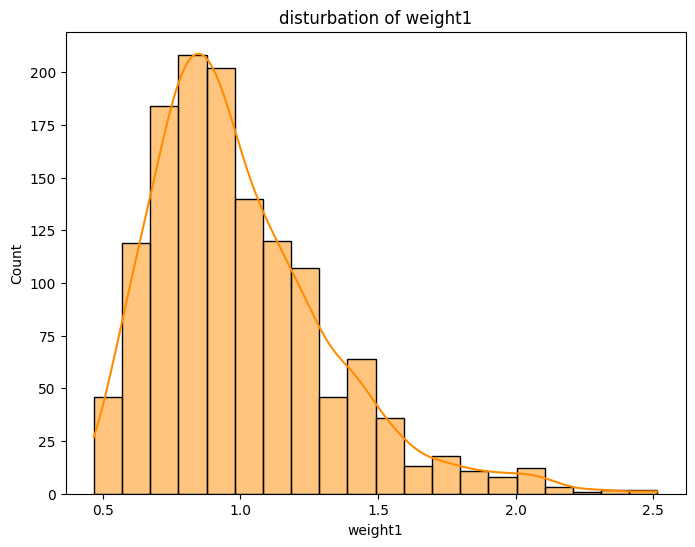

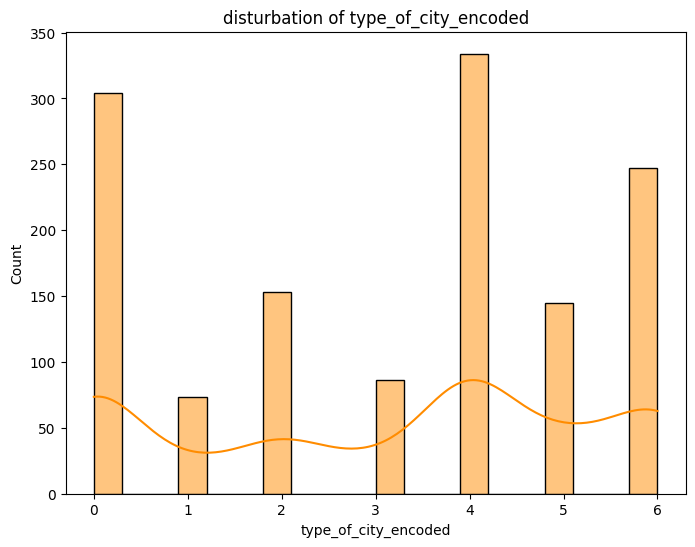

In [39]:
for col in num_col:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df,x=col,kde=True,color='darkorange',bins=20)
    plt.title(f"disturbation of {col}")

In [40]:
job_mode=df['job_type'].mode()[0]

In [41]:
df['job_type'].fillna(job_mode,inplace=True)

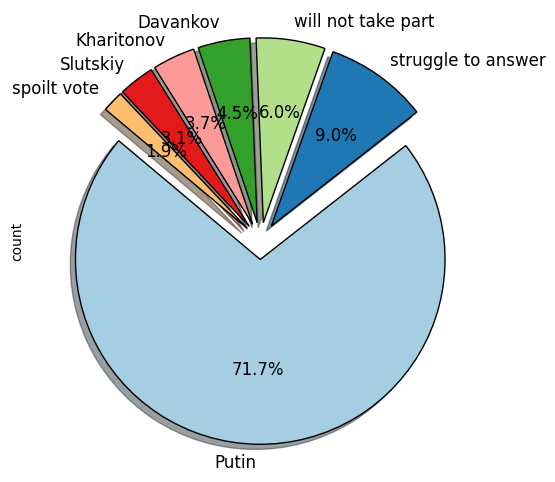

In [42]:
num_candidates = df['candidate'].nunique()
explode = [0.1] * num_candidates
plt.figure(figsize=(10,6))
df['candidate'].value_counts().plot.pie(autopct='%1.1f%%',startangle=140, wedgeprops={'edgecolor': 'black'},colors=plt.cm.Paired.colors,textprops={'fontsize': 12} ,explode=explode,shadow=True)
plt.show()

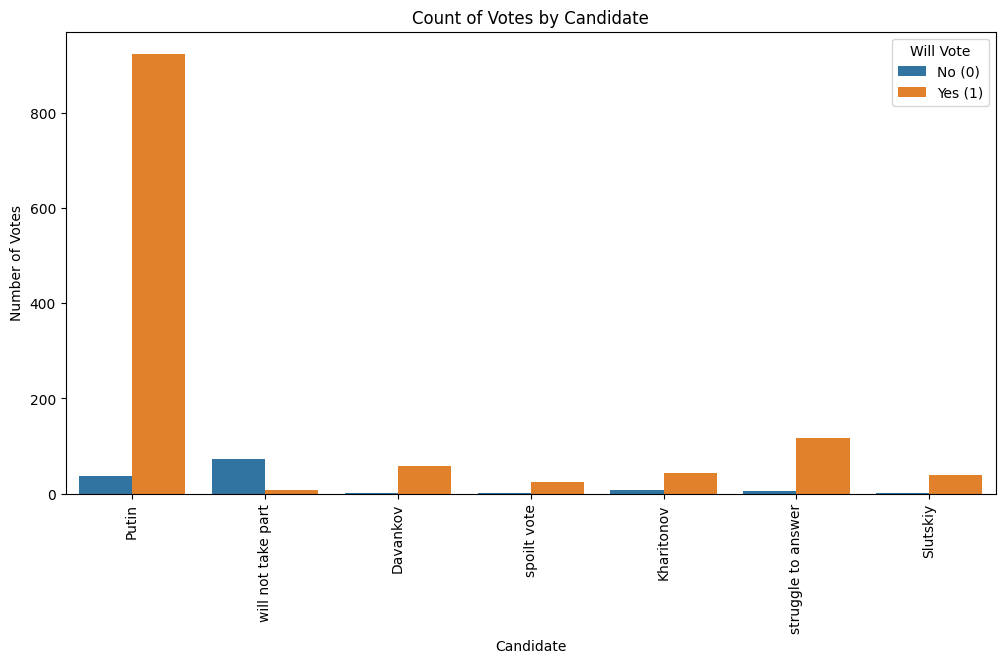

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='candidate', hue='will_vote')
plt.title('Count of Votes by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.legend(title='Will Vote', loc='upper right', labels=['No (0)', 'Yes (1)'])
plt.show()

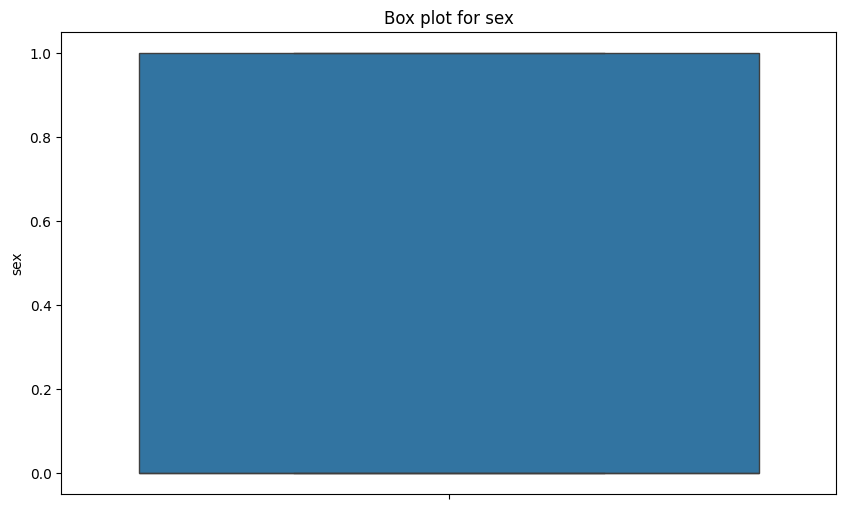

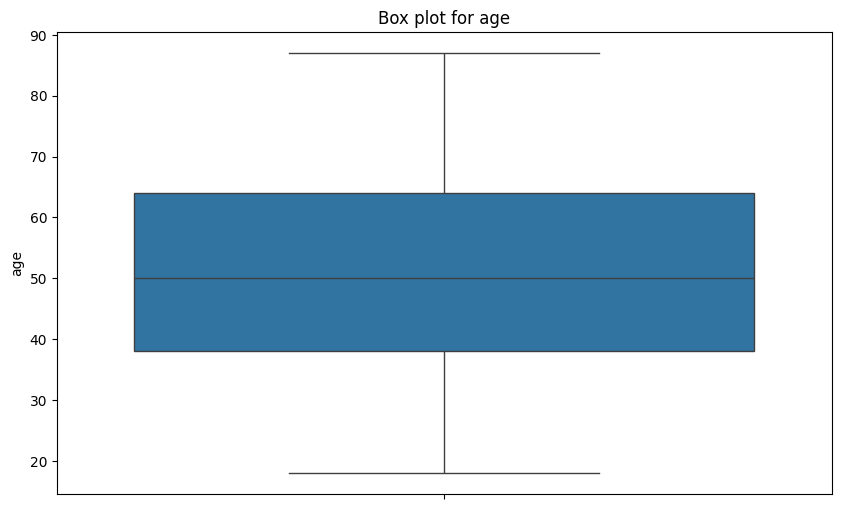

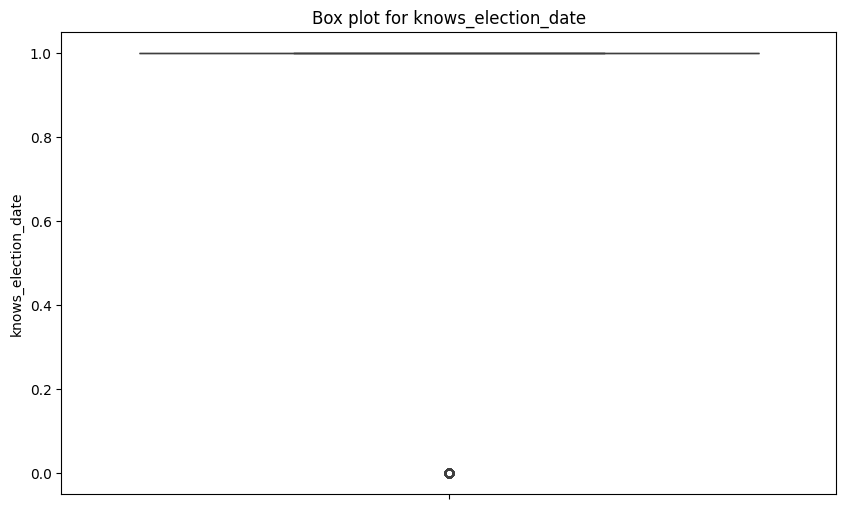

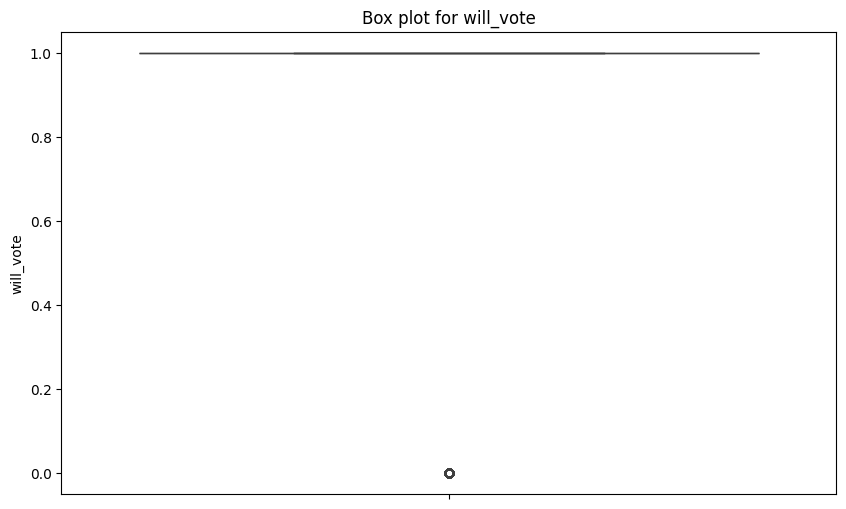

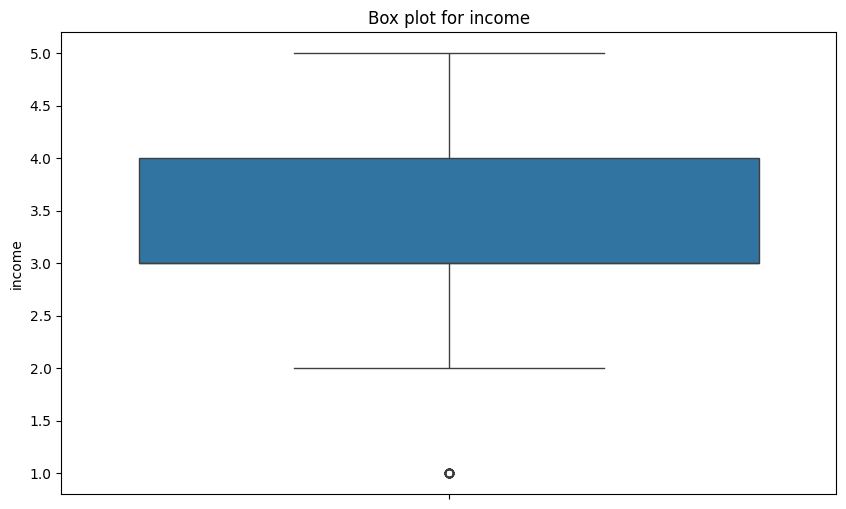

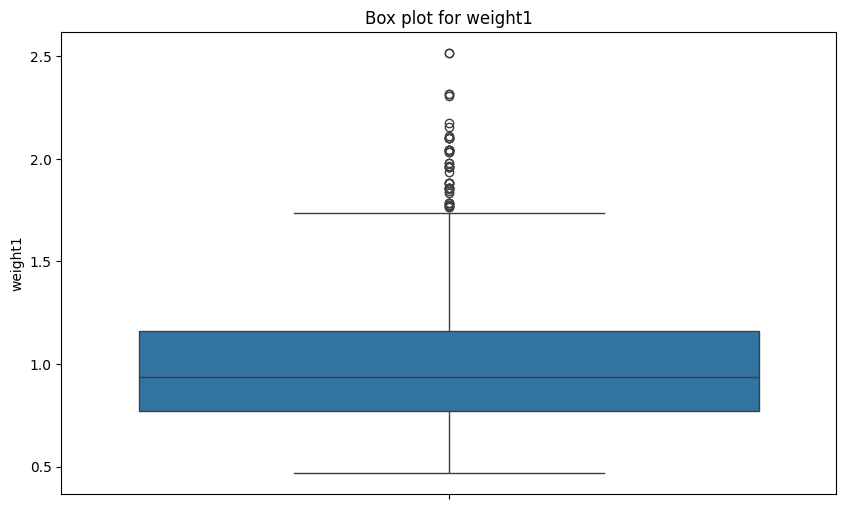

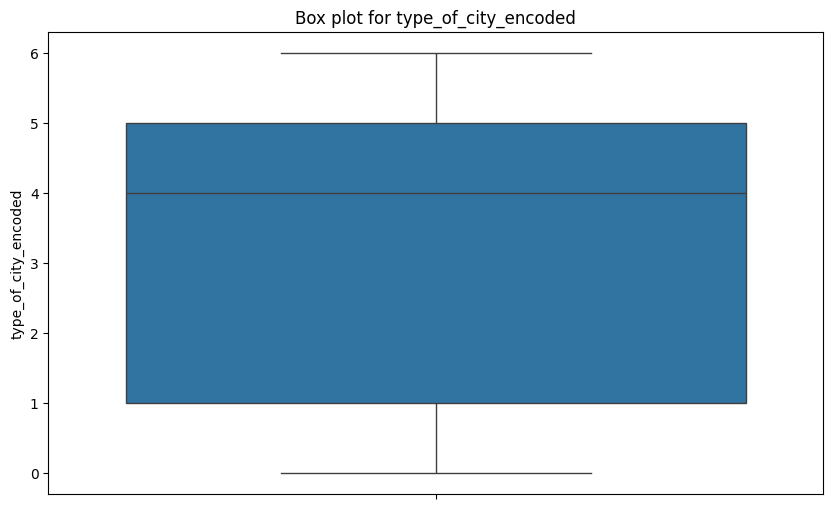

In [45]:
for col in num_col:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df,y=col)
    plt.title(f"Box plot for {col}")
    plt.show()

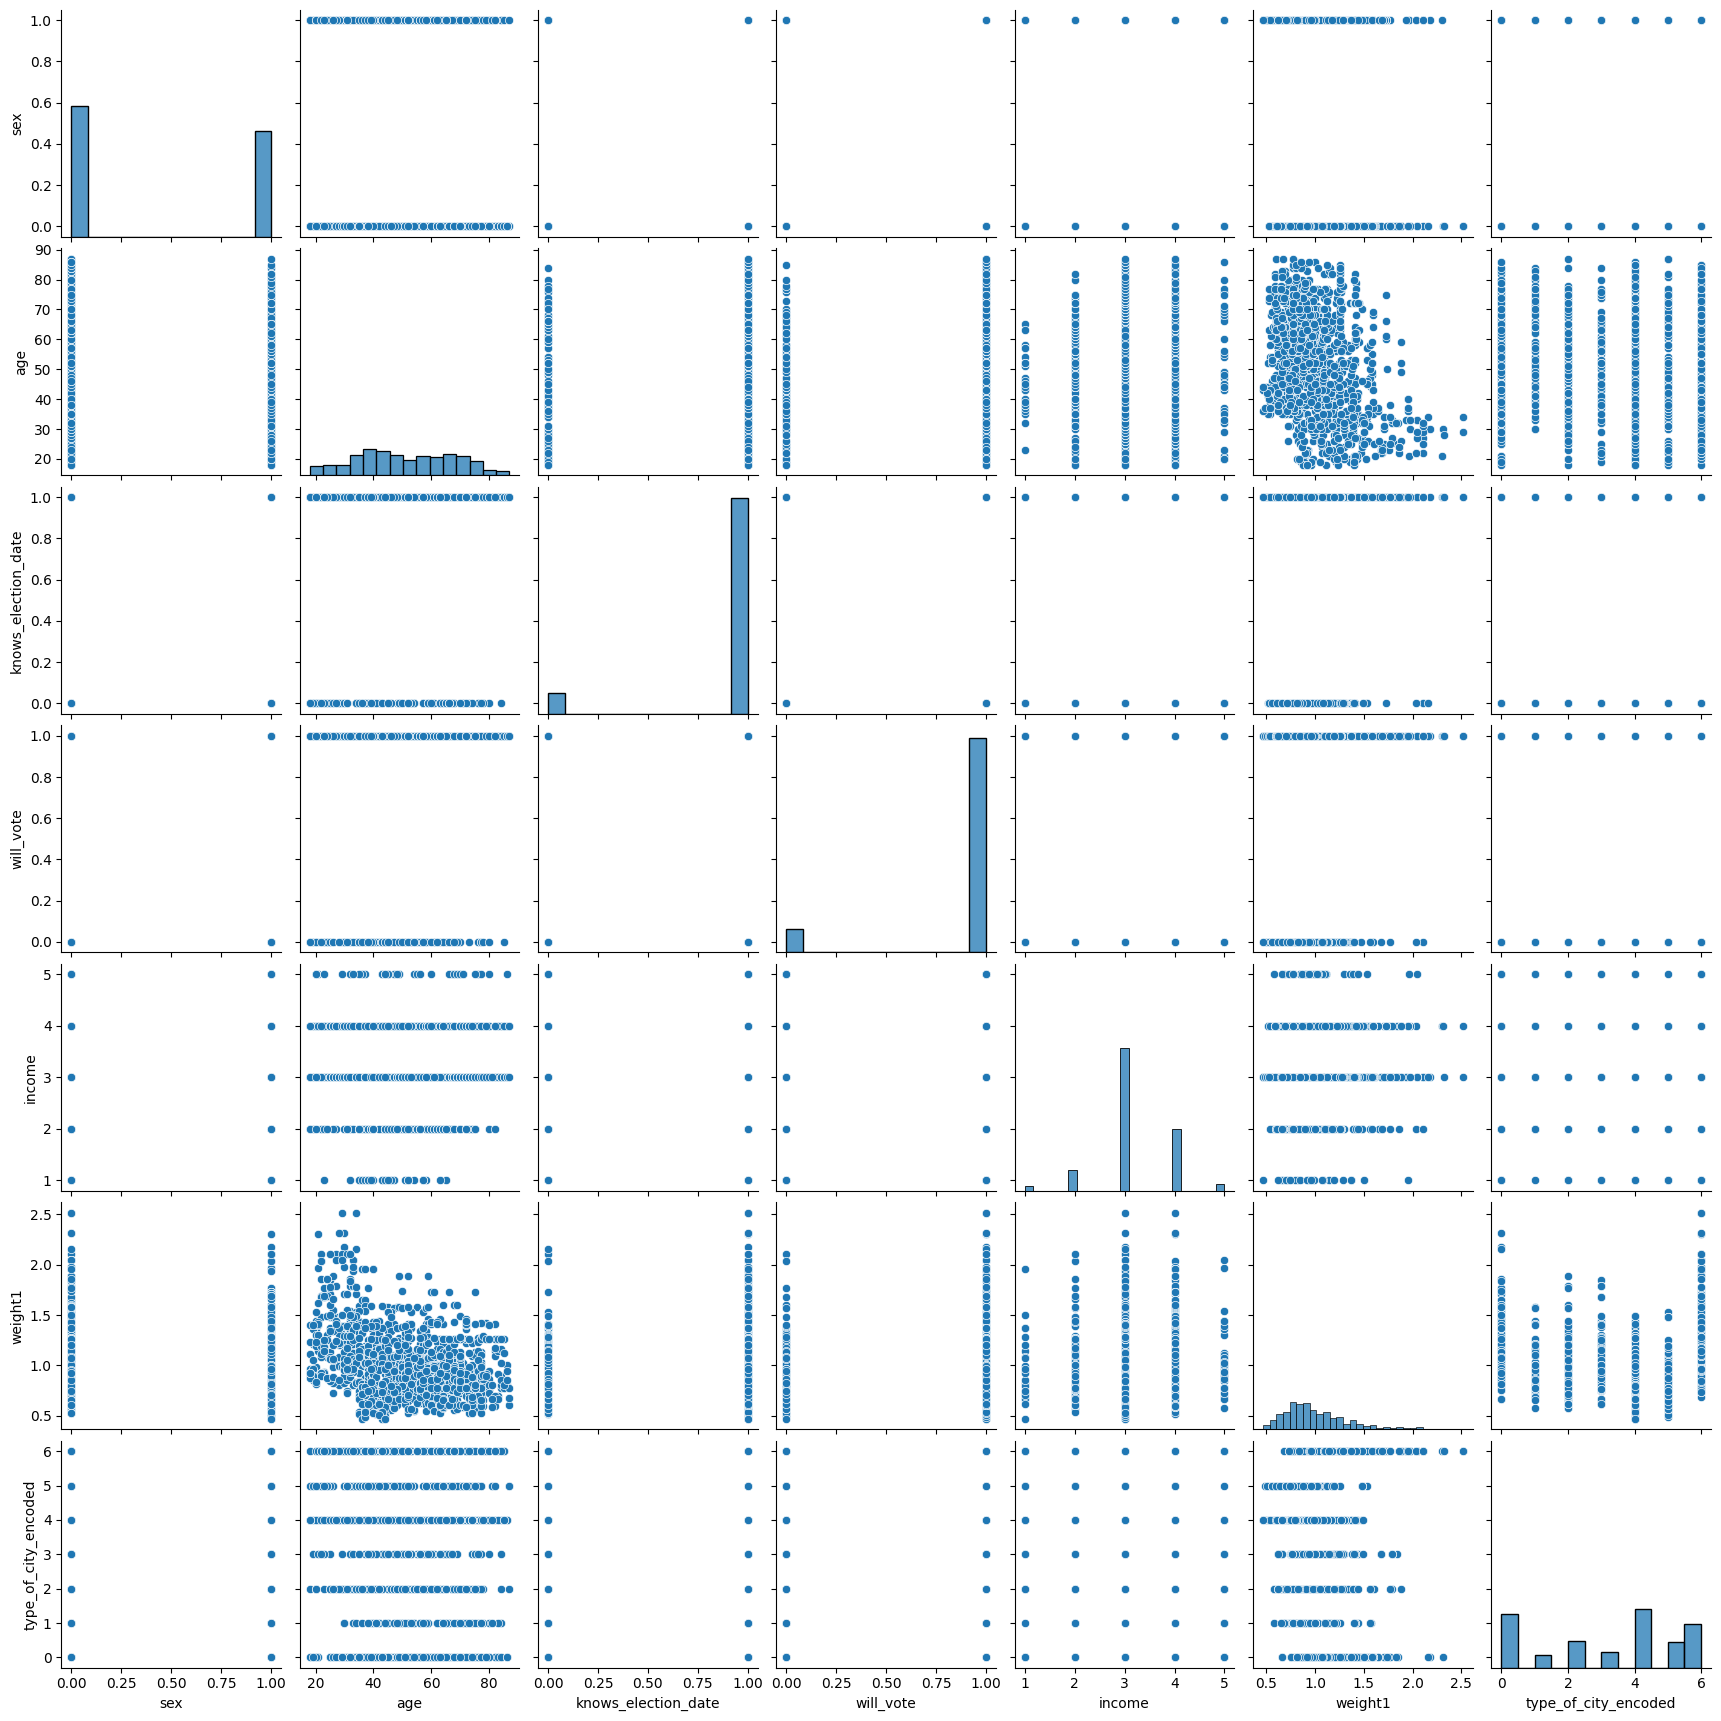

In [46]:
sns.pairplot(df[num_col])